<a href="https://colab.research.google.com/github/isabellasims/course-work/blob/master/AI_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook shows how to:

*   Load a data set from the [UC Irvine Machine Learning repository](https://archive.ics.uci.edu/ml/datasets.php) into a Pandas dataframe.
*   Train a decision tree using that data.



**Loading a dataset**

In [ ]:
import pandas as pd
import numpy as np

In this example, we'll use the [Spambase](https://archive.ics.uci.edu/ml/datasets/Spambase) dataset. Each dataset has a page describing it. From this page, we can see that:

* It's a classification task, with integer-valued and real-value attributes. That means that our *x* is an array of numbers, and our *y* is a set of discrete classes. 
* The features in *x* are based on word and character frequencies.
* The discrete classes for *y* are "yes" and "no" (whether a message is spam or not).
* There are 4601 instances (labeled examples) in the dataset.
* There are 57 attributes (this counts both the *x* and *y*).



To get the dataset itself, click on "Data Folder" at the top of the page.  This takes us to a folder with a few files. The one ending with .data is always the one with the dataset itself, in comma-separated value (CSV) format. The .names file contains labels for the columns.

Pandas supports loading a CSV directly from a URL, so let's pull it in to a dataframe.

In [ ]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
spamdata = pd.read_csv(url, header=None)

Now we have a dataframe with 4601 lines (one per instance) and 57 columns (one per attribute). We can do various things to look at it (check the Pandas documentation for more):

https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

In [ ]:
# Show the first 5 instances
spamdata.head(5)

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
# Show 5 random instances
spamdata.sample(5)

,0,1,2,3
253,64,58,0,1
55,42,58,0,1
1,30,62,3,1
0,30,64,1,1
99,47,61,0,1


The last column is the one specifying whether a given message is spam or not (1 if yes, 0 if no), so that's the one we want to use as our *y*, because we're trying to predict whether messages are spam or not. The rest of the columns, which provide features we hope are predictive, are the *x*. Let's split the dataframe up now into an *x* and *y*.

In [ ]:
# Changed 

y = spamdata[3]
x = spamdata.drop(3,axis='columns')

**Training a decision tree**

We're going to use the implementation of decision trees from scikit-learn, a popular Python machine learning library.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

But first we want to hold out some of the data as a test set, so we can use it to choose parameters that avoid overfitting. 

The function *train_test_split* has various options for splitting data into training and test sets. The simplest is to just give it a proportion of the data to hold out for the test set. Here we'll keep 20% of the data for the test set, leaving the other 80% for the training set.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Now we're ready to use our training set to train a decision tree! There are many possible parameters to *DecisionTreeClassifier()*. Here we use the defaults, except for setting *max_depth=2*, which limits how deep the tree is grown. The choice of max_depth is a parameter to the algorithm, and like with the k in k-nearest-neighbor that we saw last week, needs to be chosen empirically to balance classification performance vs. overfitting.

In [ ]:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Done! Machine learning algorithms can often take a while to train. But this is a small dataset by modern standards, and decision trees are fast to train, so it should complete nearly instantly.

Now that we have the tree, we can use it to predict whether new messages are spam. But first, let's inspect it visually. Scikit-learn comes with a feature to export decision trees to the *graphviz* graph-visualization library, and graphviz graphs can be displayed inline in our notebook.

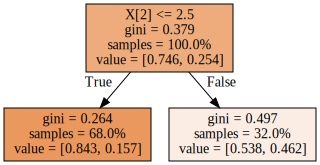

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

visual_tree = export_graphviz(tree, out_file=None, filled=True, proportion=True)
graphviz.Source(visual_tree)

Finally, we can use our model to predict the spam/not-spam status of the data we held out as a test set.

In [ ]:
y_predicted = tree.predict(x_test)

How well did it do? We have the correct labels for the test set, so we can compare the predictions to the correct answers, and count what proportion of the predictions the decision tree got right and wrong. This is a test of the model's *generalization* performance, i.e. its ability to predict results on data it wasn't trained on.

In [ ]:
np.sum(y_predicted == y_test) / len(y_test)

0.6935483870967742

So the result is that this decision tree got its predictions right about 81% of the time on the held-out test set.